In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


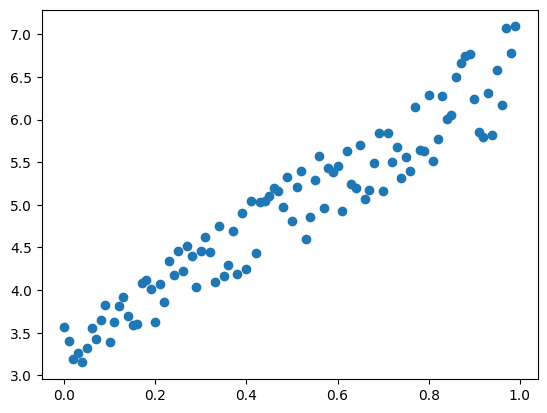

In [151]:


X = [3, 3]

def polynome(X, x):
    return X[0] + X[1] * x 

x = np.arange(0, 1, 0.01) 
Y = polynome(X, x)
noise = np.random.rand(len(x)) * Y * 0.2
Y = noise + Y

plt.scatter(x, Y)

In [113]:
def MSE(Y, Y_hat):
    return np.sum((Y - Y_hat)**2)

print(MSE(Y, Y))

0.0


8.348344414090768


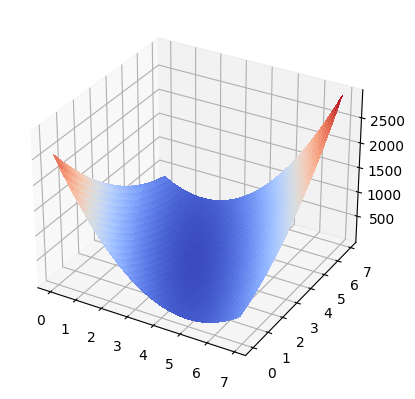

In [156]:
A = np.arange(0, 7, 0.1)
B = np.arange(0, 7, 0.1)
a, b = np.meshgrid(A, B)

errors = []

for i in range(len(a)):
    for j in range(len(b)):
        z = polynome([a[i][j], b[i][j]], x)
        errors.append(MSE(z, Y))
print(min(errors))
errors = np.array(errors).reshape(len(a), len(b))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(a, b, errors, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)



[3.49571341 2.45248208]


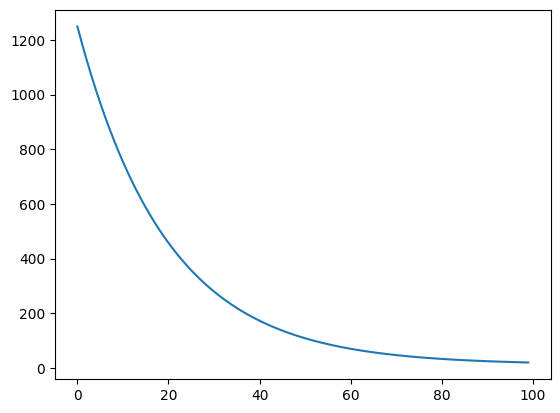

In [154]:
def gradient_descent(iterations=100, delta=0.01, step=1):
    X = [1, 1]
    errors = []
    for _ in range(iterations):
        z = polynome(X, x)
        error = MSE(z, Y)
        errors.append(error)

        grad = np.zeros(len(X))
        for i in range(len(X)):
            e = np.zeros(len(X))
            e[i] = 1
            z1 = polynome(X + e * delta, x)
            z2 = polynome(X - e * delta, x)
            error1 = MSE(z1, Y)
            error2 = MSE(z2, Y)
            grad[i] = (error1 - error2) / 2*delta
        
        X = X - step * grad
    print(X)
    plt.plot(errors)

gradient_descent()   

